<a href="https://colab.research.google.com/github/honicky/character-extraction/blob/main/Character_Extractor_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd

proprietary_models_pdf = pd.DataFrame({"name":{"0":"gpt-3.5","1":"haiku","2":"haiku-tool","3":"sonnet"},"precision":{"0":0.885640648,"1":0.9028145966,"2":0.8756850538,"3":0.800981836},"recall":{"0":0.906672394,"1":0.9369988545,"2":0.9382875143,"3":0.8974799542},"f1":{"0":0.8904982441,"1":0.9122840269,"2":0.8984140396,"3":0.8368819089},"time":{"0":142.368,"1":139.648,"2":149.462,"3":292.577},"time_per_story":{"0":0.7338556701,"1":0.7198350515,"2":0.7704226804,"3":1.508128866},"input_tokens":{"0":84580,"1":89882,"2":170974,"3":84580},"output_tokens":{"0":4703,"1":6872,"2":9107,"3":4703},"total_cost":{"0":0.0493445,"1":0.0310605,"2":0.05412725,"3":0.324285}})




In [26]:
proprietary_models_pdf["cost_per_story"] = proprietary_models_pdf["total_cost"]/ 190
proprietary_models_pdf

,name,precision,recall,f1,time,time_per_story,input_tokens,output_tokens,total_cost,cost_per_story
0,gpt-3.5,0.885641,0.906672,0.890498,142.368,0.733856,84580,4703,0.049344,0.000260
1,haiku,0.902815,0.936999,0.912284,139.648,0.719835,89882,6872,0.031061,0.000163
2,haiku-tool,0.875685,0.938288,0.898414,149.462,0.770423,170974,9107,0.054127,0.000285
3,sonnet,0.800982,0.897480,0.836882,292.577,1.508129,84580,4703,0.324285,0.001707


In [27]:
rtx4000_cost = 0.21 /3600 * 2
t4_adjusted_cost = rtx4000_cost * 28.01/50.17
l4_adjusted_cost = rtx4000_cost * 29.77/50.17
a100_adjusted_cost = 1.29 / 3600 * 2

cost_per_second = {
  "ner": t4_adjusted_cost,
  "lora": l4_adjusted_cost,
  "phi": a100_adjusted_cost,
  "mistral": a100_adjusted_cost,
}

In [47]:
ner_metrics = {
  'name': 'DistilBeRT-NER',
  'precision': 0.6406666666666666,
  'recall': 0.663095238095238,
  'f1': 0.638903318903319,
  'time': 96.23519327899999,
  'time_per_story': 0.48117596639499993,
  'cost_per_story': 0.48117596639499993 * t4_adjusted_cost,
}

lora_metrics = {
  'name': 'T5 LoRA',
  'precision': 0.8756599832915622,
  'recall': 0.886578947368421,
  'f1': 0.8749092428039797,
  'time': 75.6676,
  'time_per_story': 1/2.511,
  'cost_per_story': 1/2.511 * l4_adjusted_cost,

}

phi_metrics = {
  'name': 'Phi-3-mini 3.8B',
  'precision': 0.8006095565373916,
  'recall': 0.8372565864833906,
  'f1': 0.8084318316277079,
  'time': 239.39821746899997,
  'time_per_story': 1.234011430252577,
  'cost_per_story': 1.234011430252577 * a100_adjusted_cost,
}

phi_fireworks_metrics = {
  'name': 'Phi-3-mini 3.8B - Firework.ai (calculated)',
  'precision': 0.8006095565373916,
  'recall': 0.8372565864833906,
  'f1': 0.8084318316277079,
  'time': 239.39821746899997,
  'time_per_story': None,
  'cost_per_story': (89882 + 6872) * 0.20 / 1_000_000 / 190,
}

mistral_metrics = {
  'name': 'Mistral-7B',
  'precision': 0.8469378988708884,
  'recall': 0.8605670103092783,
  'f1': 0.8454758569373488,
  'time': 269.8045599230004,
  'time_per_story': 1.3907451542422702,
  'cost_per_story': 1.3907451542422702 * a100_adjusted_cost,
}

mistral_fireworks_metrics = {
  'name': 'Mistral-7B - Firework.ai (calculated)',
  'precision': 0.8469378988708884,
  'recall': 0.8605670103092783,
  'f1': 0.8454758569373488,
  'time': 269.8045599230004,
  'time_per_story': None,
  'cost_per_story': (89882 + 6872) * 0.20 / 1_000_000 / 190,
}

In [45]:

# Convert dictionaries to dataframes
ner_pdf = pd.DataFrame([ner_metrics])
lora_pdf = pd.DataFrame([lora_metrics])
phi_pdf = pd.DataFrame([phi_metrics])
phi_fireworks_pdf = pd.DataFrame([phi_fireworks_metrics])
mistral_pdf = pd.DataFrame([mistral_metrics])
mistral_fireworks_pdf = pd.DataFrame([mistral_fireworks_metrics])

# Concatenate all dataframes
combined_pdf = pd.concat([proprietary_models_pdf.drop(columns=["input_tokens", "output_tokens", "total_cost"]), ner_pdf, lora_pdf, phi_pdf, phi_fireworks_pdf, mistral_pdf, mistral_fireworks_pdf], ignore_index=True)
combined_pdf

,name,precision,recall,f1,time,time_per_story,cost_per_story
0,gpt-3.5,0.885641,0.906672,0.890498,142.368000,0.733856,0.000260
1,haiku,0.902815,0.936999,0.912284,139.648000,0.719835,0.000163
2,haiku-tool,0.875685,0.938288,0.898414,149.462000,0.770423,0.000285
3,sonnet,0.800982,0.897480,0.836882,292.577000,1.508129,0.001707
4,DistilBeRT-NER,0.640667,0.663095,0.638903,96.235193,0.481176,0.000031
5,T5 LoRA,0.875660,0.886579,0.874909,75.667600,0.398248,0.000028
6,Phi-3-mini 3.8B,0.800610,0.837257,0.808432,239.398217,1.234011,0.000884
7,Phi-3-mini 3.8B\nFirework.ai (calculated),0.800610,0.837257,0.808432,239.398217,None,0.000102
8,Mistral-7B,0.846938,0.860567,0.845476,269.804560,1.390745,0.000997
9,Mistral-7B\nFirework.ai (calculated),0.846938,0.860567,0.845476,269.804560,None,0.000102


In [56]:
import plotly.graph_objects as go

# Define a list of positions for each label to avoid overlap
text_positions = [
  'top left',
  'top center',
  'top right',
  'top center',
  'top center',
  'bottom center',
  'top center',
  'bottom left',
  'top center',
  'top center',
]

# Create the scatter plot with annotations
fig = go.Figure()

# Add scatter plot trace
fig.add_trace(go.Scatter(
  x=combined_pdf["f1"],
  y=combined_pdf["cost_per_story"],
  mode='markers+text',
  text=combined_pdf["name"],
  textposition=text_positions[:len(combined_pdf)],  # Assign positions to each label
  textfont=dict(size=10)
))

# Adding labels and a title for better readability
fig.update_layout(
  title="F1 Score vs Cost per Story",
  xaxis_title="F1 Score",
  yaxis_title="Cost per Story",
  plot_bgcolor='white',  # Set background color to white
  xaxis=dict(
    showgrid=True,       # Show grid lines
    gridcolor='lightgray'  # Set grid line color to light gray
  ),
  yaxis=dict(
    showgrid=True,       # Show grid lines
    gridcolor='lightgray'  # Set grid line color to light gray
  )
)

# Show the plot
fig.show()


In [62]:
import plotly.graph_objects as go

# Define a list of positions for each label to avoid overlap
text_positions = [
  'bottom center',
  'top center',
  'top center',
  'top center',
  'top center',
  'top center',
  'top center',
  'bottom left',
  'top center',
  'top center',
]

# Create the scatter plot with annotations
fig = go.Figure()

# Add scatter plot trace
fig.add_trace(go.Scatter(
  x=combined_pdf["f1"],
  y=combined_pdf["time_per_story"],
  mode='markers+text',
  text=combined_pdf["name"],
  textposition=text_positions[:len(combined_pdf)],  # Assign positions to each label
  textfont=dict(size=10)
))

# Adding labels and a title for better readability
fig.update_layout(
  title="F1 Score vs Time per Story",
  xaxis_title="F1 Score",
  yaxis_title="Time per Story",
  plot_bgcolor='white',  # Set background color to white
  xaxis=dict(
    showgrid=True,       # Show grid lines
    gridcolor='lightgray'  # Set grid line color to light gray
  ),
  yaxis=dict(
    showgrid=True,       # Show grid lines
    gridcolor='lightgray'  # Set grid line color to light gray
  )
)

# Show the plot
fig.show()


* L4 GPUs on AWS: https://aws.amazon.com/ec2/instance-types/g6/
* L4 GPUs on GCP: https://cloud.google.com/colab/pricing

https://technical.city/en/video/Tesla-T4-vs-RTX-A4000
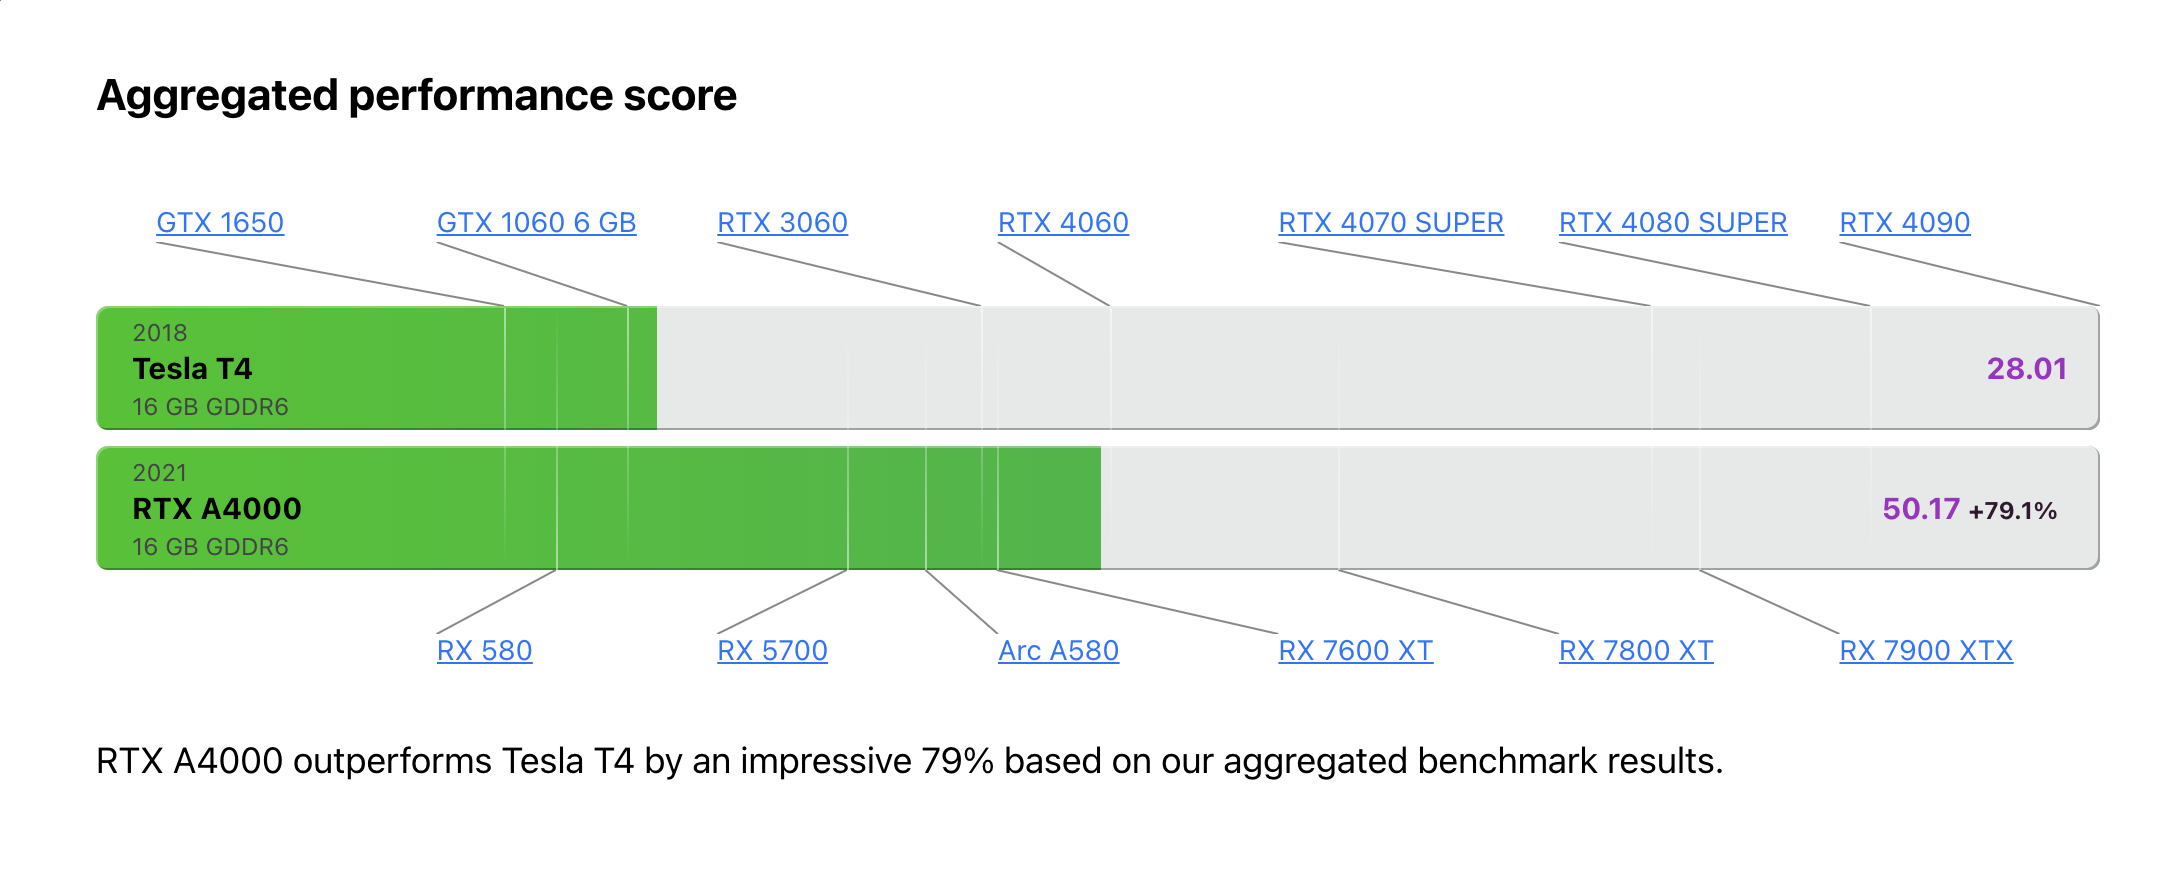

https://technical.city/en/video/RTX-A4000-vs-L4
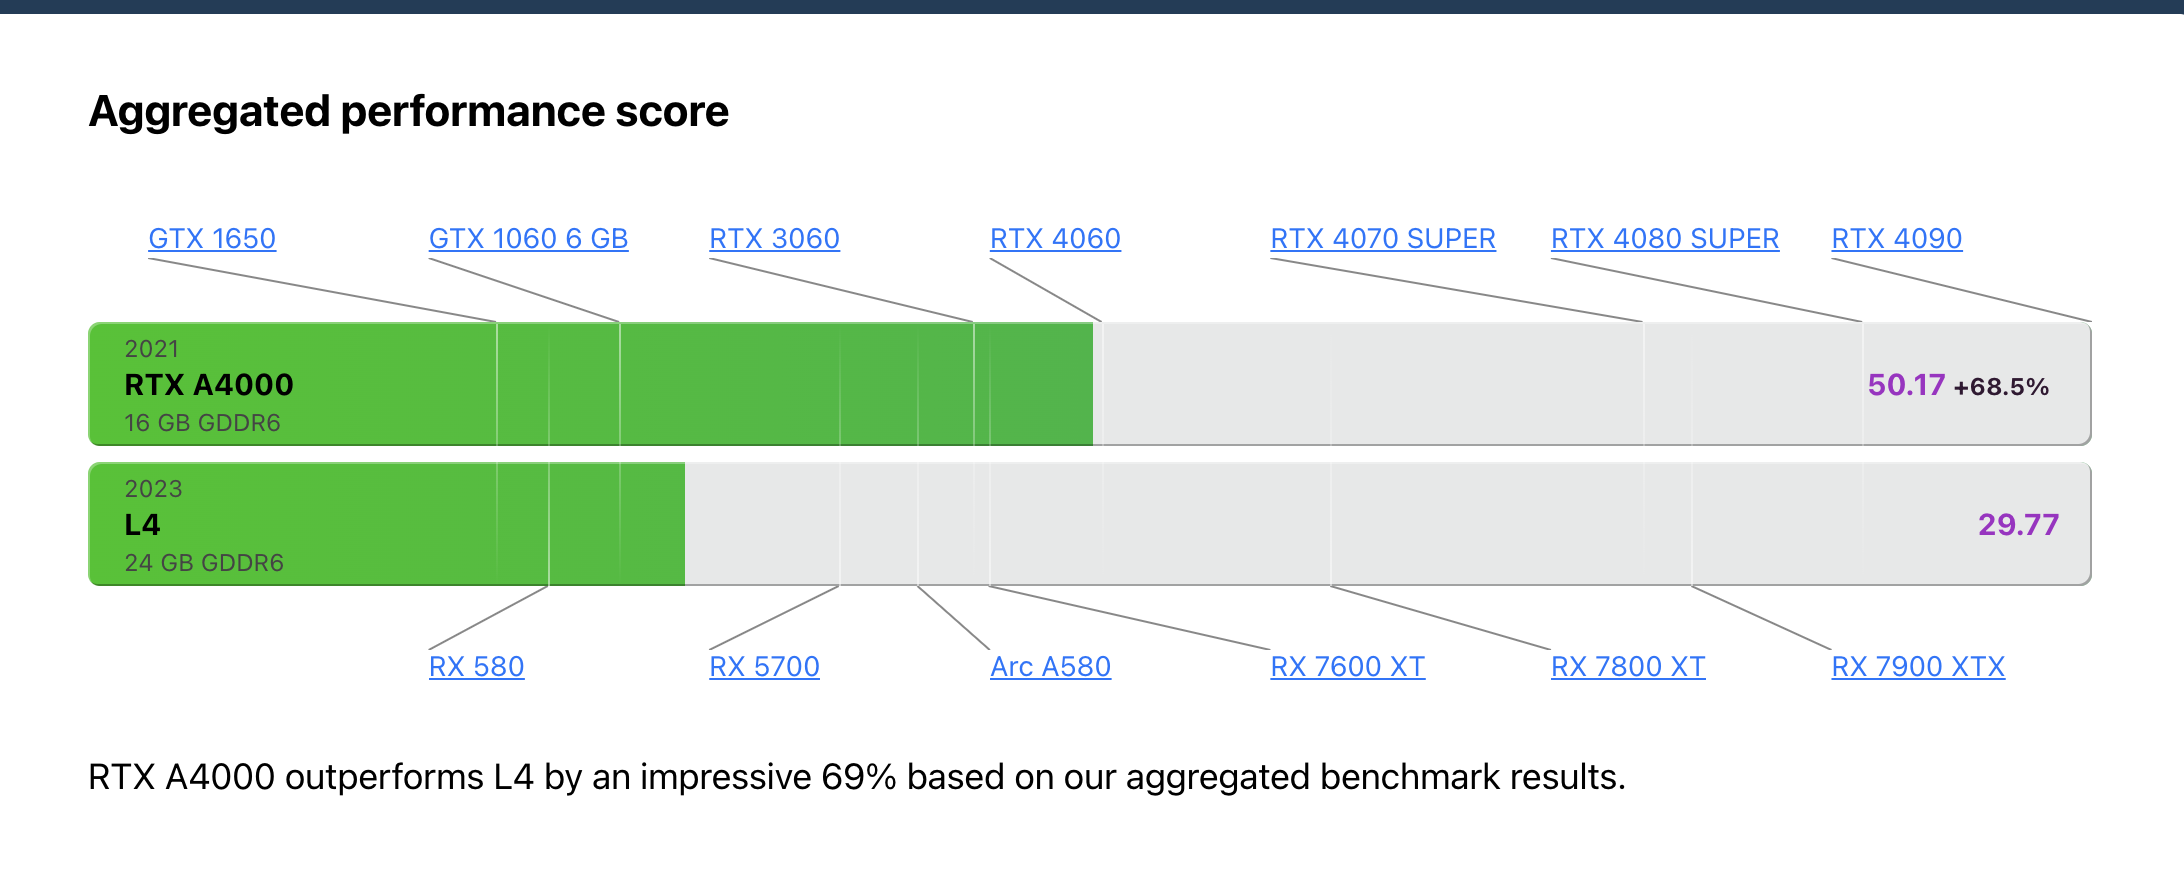

https://www.runpod.io/gpu-instance/pricing

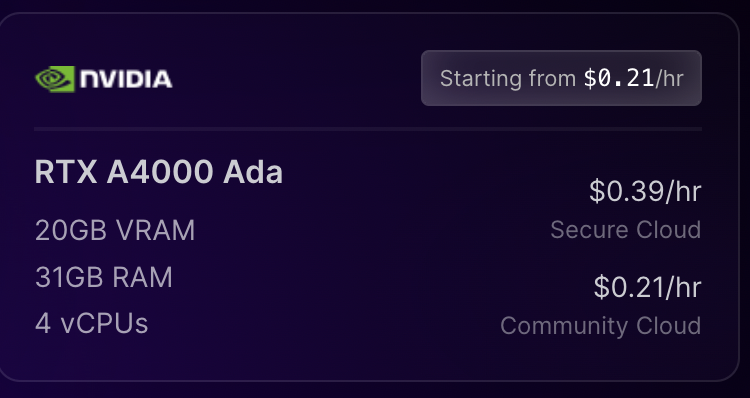